<h1 align="center"> Project Setup </h1>

#### Install Packages

In [1]:
!pip install --upgrade pip
!pip install yellowbrick
!pip install folium
!pip install geopandas
!pip install fuzzywuzzy

  Using cached pip-21.3.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


#### Importing Dependencies

In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning packages
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Fuzzywuzzy to deal with Typos or Misspellings values
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Import modules for the map
import folium
import geopandas

# Settings
import warnings
warnings.filterwarnings('ignore')

/Users/kesnel/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


#### Importing Datasets

In [3]:
# Display all columns in the DataFrame using pandas settings
pd.set_option('display.max_columns', None)

In [4]:
df_imports = pd.read_excel('data/simple_WTO_dataset_merchandise_imports_by_product_group_annual_million_US_dollar.xlsx')
geo_map = pd.read_csv("data/countries.csv")

<br><br>

<h1 align="center"> Summary</h1>

### Objective

This project focuses on how the country will be able to know the right market to export their products. This will allow the country to get a good guide on foreign trade, and know which countries have High demand in different sectors, especially agricultural products.

The specific objectives of this project are:
1. Analyze the dataset that we are going to collect to better understand and give
some insight on the international trade
2. Choose the best place with the High demand for agricultural products so that Haiti can promote and sell its products

<hr>

### Hypothesis: Research Question?

What is the question that you would like to answer in order to make a decision.

<hr>

### Data Source

For this project we will be using the World Trade Organization(WTO) data portal to have access to. The WTO Data portal contains statistical indicators, Available time series cover merchandise trade and trade in services statistics, market access indicators (bound, applied & preferential tariffs), non-tariff information as well as other indicators.

<br><br>

<h1 align="center"> Data Cleaning </h1>

#### Introduce the Data

In [5]:
# Displaying the countries import product dataframe
print('------ Imports Dataset ------')
display(df_imports.head(4))

------ Imports Dataset ------


,Indicator,Merchandise imports by product group – annual (Million US dollar),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Reporting Economy,Product/Sector,Partner Economy,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
2,Afghanistan,SI3_AGG - AG - Agricultural products,World,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0
3,Afghanistan,SI3_AGG - MI - Fuels and mining products,World,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0


In [6]:
print('------------------------------ Dataset Shape ------------------------------')
print('The Imports dataset has',df_imports.shape[0], 'Rows and', df_imports.shape[1],'columns')

print('------------------------------ Dataframe Columns ------------------------------')
display(df_imports.columns)

print('------------------------------ Data types ------------------------------')
display(df_imports.dtypes)

------------------------------ Dataset Shape ------------------------------
The Imports dataset has 1293 Rows and 13 columns
------------------------------ Dataframe Columns ------------------------------


Index(['Indicator',
       '  Merchandise imports by product group – annual (Million US dollar)',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

------------------------------ Data types ------------------------------


Indicator                                                               object
  Merchandise imports by product group – annual (Million US dollar)     object
Unnamed: 2                                                              object
Unnamed: 3                                                             float64
Unnamed: 4                                                             float64
Unnamed: 5                                                             float64
Unnamed: 6                                                             float64
Unnamed: 7                                                             float64
Unnamed: 8                                                             float64
Unnamed: 9                                                             float64
Unnamed: 10                                                            float64
Unnamed: 11                                                            float64
Unnamed: 12                                         

In [7]:
# Display all columns
print('-------- Imports column names --------')
display(df_imports.columns)

# Change columns name
map_cols_name = {
    'Indicator':'Reporting Economy',
    '  Merchandise imports by product group – annual (Million US dollar)': 'Product/Sector',
    'Unnamed: 2': 'Partner Economy',
    'Unnamed: 3': '2010',
    'Unnamed: 4': '2011',
    'Unnamed: 5': '2012',
    'Unnamed: 6': '2013',
    'Unnamed: 7': '2014',
    'Unnamed: 8': '2015',
    'Unnamed: 9': '2016',
    'Unnamed: 10': '2017',
    'Unnamed: 11': '2018',
    'Unnamed: 12': '2019',
}

# Change all default column names
renamed_cols_df = df_imports.rename(columns=map_cols_name)

print('-------- Imports Dataframe with new cols names --------')
display(renamed_cols_df.head(5))

-------- Imports column names --------


Index(['Indicator',
       '  Merchandise imports by product group – annual (Million US dollar)',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12'],
      dtype='object')

-------- Imports Dataframe with new cols names --------


,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Reporting Economy,Product/Sector,Partner Economy,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
2,Afghanistan,SI3_AGG - AG - Agricultural products,World,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0
3,Afghanistan,SI3_AGG - MI - Fuels and mining products,World,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0
4,Afghanistan,SI3_AGG - MAIS - Iron and steel,World,42.0,69.0,96.0,93.0,82.0,25.0,25.0,29.0,218.0,51.0


In [8]:
'''
Remove the first 2 rows in the imports dataframe 
And also drop rows that contains the world import record and Haiti record
'''
drop_first_rows = renamed_cols_df.index[:2]
drop_countries_n_world = renamed_cols_df.loc[(renamed_cols_df['Reporting Economy'] == "Haiti") | (renamed_cols_df['Reporting Economy'] == "World")]

dropped_first_rows_df = renamed_cols_df.drop(drop_first_rows)
dropped_rows_df = dropped_first_rows_df.drop(drop_countries_n_world.index, axis=0).reset_index(drop=True)

display(dropped_rows_df)

,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,SI3_AGG - AG - Agricultural products,World,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0
1,Afghanistan,SI3_AGG - MI - Fuels and mining products,World,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0
2,Afghanistan,SI3_AGG - MAIS - Iron and steel,World,42.0,69.0,96.0,93.0,82.0,25.0,25.0,29.0,218.0,51.0
3,Afghanistan,SI3_AGG - MACH - Chemicals,World,82.0,98.0,136.0,131.0,116.0,96.0,98.0,110.0,281.0,621.0
4,Afghanistan,SI3_AGG - MAMT - Machinery and transport equip...,World,339.0,245.0,342.0,329.0,291.0,214.0,360.0,407.0,869.0,1502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,Zimbabwe,SI3_AGG - MAIS - Iron and steel,World,105.0,160.0,149.0,138.0,147.0,141.0,137.0,119.0,173.0,144.0
1283,Zimbabwe,SI3_AGG - MACH - Chemicals,World,605.0,2650.0,1049.0,1850.0,1083.0,961.0,796.0,835.0,1234.0,895.0
1284,Zimbabwe,SI3_AGG - MAMT - Machinery and transport equip...,World,1859.0,1831.0,1911.0,1554.0,1328.0,1415.0,1147.0,1096.0,1553.0,1160.0
1285,Zimbabwe,SI3_AGG - MATE - Textiles,World,67.0,88.0,91.0,87.0,83.0,73.0,53.0,62.0,80.0,66.0


In [9]:
print('------------ Display values in the Product/Sectors on the Import dataset columns ------------')
display(dropped_rows_df['Product/Sector'].value_counts())

# Remove all non use coverage CODE before the last hyphen in all value in the "Product/sector" column
dropped_rows_df['Product/Sector'] = dropped_rows_df['Product/Sector'].apply(lambda x: x.split('- ')[-1])

# Also drop the ['Partner Economy']columns
df_final = dropped_rows_df.drop(['Partner Economy'],axis=1)

print('---- Final import dataframe ----')
display(df_final.head())

------------ Display values in the Product/Sectors on the Import dataset columns ------------


SI3_AGG - MACH - Chemicals                            184
SI3_AGG - AG - Agricultural products                  184
SI3_AGG - MAMT - Machinery and transport equipment    184
SI3_AGG - MI - Fuels and mining products              184
SI3_AGG - MAIS - Iron and steel                       184
SI3_AGG - MACL - Clothing                             184
SI3_AGG - MATE - Textiles                             183
Name: Product/Sector, dtype: int64

---- Final import dataframe ----


,Reporting Economy,Product/Sector,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,Agricultural products,706.0,897.0,1248.0,1200.0,1064.0,1485.0,1539.0,1740.0,2656.0,2484.0
1,Afghanistan,Fuels and mining products,1090.0,2240.0,3118.0,2999.0,2657.0,1658.0,1045.0,1181.0,1102.0,340.0
2,Afghanistan,Iron and steel,42.0,69.0,96.0,93.0,82.0,25.0,25.0,29.0,218.0,51.0
3,Afghanistan,Chemicals,82.0,98.0,136.0,131.0,116.0,96.0,98.0,110.0,281.0,621.0
4,Afghanistan,Machinery and transport equipment,339.0,245.0,342.0,329.0,291.0,214.0,360.0,407.0,869.0,1502.0


#### More data cleaning

In [10]:
df_melt = df_final.copy()

In [11]:
# Melt the Dataframe
df_melt = pd.melt(frame=df_final, 
                  id_vars=['Product/Sector','Reporting Economy'], 
                  var_name='Year', 
                  value_name="Million US dollar")

# Reshape the dataframe using pivot_table
reshape = df_melt.pivot_table(columns='Product/Sector',
                             index=['Year','Reporting Economy'],
                             values="Million US dollar")

# Reset the index to have a beautifull dataframe
reshape = reshape.reset_index()

# Remove Index name
reshape = reshape.rename_axis(None, axis=1)

# Display the reshape DF 
reshape.head()

,Year,Reporting Economy,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
0,2010,Afghanistan,706.0,82.0,12.0,1090.0,42.0,339.0,118.0
1,2010,Albania,872.0,464.0,173.0,802.0,209.0,875.0,168.0
2,2010,Algeria,7350.0,4452.0,183.0,1493.0,5235.0,16716.0,351.0
3,2010,Angola,2882.0,963.0,127.0,3233.0,1046.0,6475.0,108.0
4,2010,Antigua and Barbuda,113.0,33.0,8.0,6.0,6.0,99.0,12.0


#### Treatment of Missing Values

In [12]:
# Checking for missing values in the import dataset
reshape.isnull().sum()

Year                                 0
Reporting Economy                    0
Agricultural products                2
Chemicals                            0
Clothing                             2
Fuels and mining products            0
Iron and steel                       2
Machinery and transport equipment    0
Textiles                             4
dtype: int64

In [13]:
reshape.shape

(1750, 9)

In [14]:
# check if we don't have Duplicated values in the dataframe
print(reshape.duplicated().sum(), 'value')

0 value


In [15]:
# Dealing with missing single value with the fillna function
df_reshape_fill_na = reshape.dropna(how='any')

In [16]:
print('---- World import dataset ----')
display(df_reshape_fill_na.isna().sum())


print('---------------')
display('Now all of our empty values have been successfully filled with 0')

---- World import dataset ----


Year                                 0
Reporting Economy                    0
Agricultural products                0
Chemicals                            0
Clothing                             0
Fuels and mining products            0
Iron and steel                       0
Machinery and transport equipment    0
Textiles                             0
dtype: int64

---------------


'Now all of our empty values have been successfully filled with 0'

In [17]:
# Change data type Float --> Int
print('-------- old data type --------')
display(df_reshape_fill_na.dtypes)


# Change Float type to Int (From the "Agricultural products" to "Total merchandise" columns)
df_reshape_fill_na.iloc[:,2:] = df_reshape_fill_na.iloc[:,2:].astype(int)

# Dataframe final
data_f = df_reshape_fill_na

print('-------- New import data type --------')
display(data_f.dtypes)

-------- old data type --------


Year                                  object
Reporting Economy                     object
Agricultural products                float64
Chemicals                            float64
Clothing                             float64
Fuels and mining products            float64
Iron and steel                       float64
Machinery and transport equipment    float64
Textiles                             float64
dtype: object

-------- New import data type --------


Year                                 object
Reporting Economy                    object
Agricultural products                 int64
Chemicals                             int64
Clothing                              int64
Fuels and mining products             int64
Iron and steel                        int64
Machinery and transport equipment     int64
Textiles                              int64
dtype: object

#### Merge the dataframe with the geo_map

In [18]:
# Import the countries data for more visualizations with Geopandas
display(geo_map.head())

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [19]:
# Copy the old DF
to_merge = data_f.copy()

In [20]:
# Now let's deal with Typos or Misspellings in the Dataframe by applying Fuzzy Search Before merging
to_merge['Reporting Economy'] = to_merge['Reporting Economy'].map(lambda x: process.extractOne(x, geo_map['name'])[0])

In [21]:
# Merge the countries geo data with our Data set
merged_data = pd.merge(to_merge,geo_map[['name', 'latitude', 'longitude']], 
                      left_on="Reporting Economy", 
                      right_on="name", 
                      how="left",
                      indicator=True)

In [22]:
print("-- Overview the merged dataframe--")
display(merged_data.head())

print("-- Check if we don't miss any values --")
display(merged_data._merge.value_counts())
print('-- All values are now cleaned up and are successfully merged !! --')

-- Overview the merged dataframe--


,Year,Reporting Economy,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles,name,latitude,longitude,_merge
0,2010,Afghanistan,706,82,12,1090,42,339,118,Afghanistan,33.939110,67.709953,both
1,2010,Albania,872,464,173,802,209,875,168,Albania,41.153332,20.168331,both
2,2010,Algeria,7350,4452,183,1493,5235,16716,351,Algeria,28.033886,1.659626,both
3,2010,Angola,2882,963,127,3233,1046,6475,108,Angola,-11.202692,17.873887,both
4,2010,Antigua and Barbuda,113,33,8,6,6,99,12,Antigua and Barbuda,17.060816,-61.796428,both


-- Check if we don't miss any values --


both          1746
right_only       0
left_only        0
Name: _merge, dtype: int64

-- All values are now cleaned up and are successfully merged !! --


In [23]:
# Dop the indicator column
merged_df = merged_data.drop(columns=['name', '_merge'], axis=0)

# Display the final merged dataframe
merged_df.head()

,Year,Reporting Economy,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles,latitude,longitude
0,2010,Afghanistan,706,82,12,1090,42,339,118,33.939110,67.709953
1,2010,Albania,872,464,173,802,209,875,168,41.153332,20.168331
2,2010,Algeria,7350,4452,183,1493,5235,16716,351,28.033886,1.659626
3,2010,Angola,2882,963,127,3233,1046,6475,108,-11.202692,17.873887
4,2010,Antigua and Barbuda,113,33,8,6,6,99,12,17.060816,-61.796428


In [24]:
merged_df.columns

Index(['Year', 'Reporting Economy', 'Agricultural products', 'Chemicals',
       'Clothing', 'Fuels and mining products', 'Iron and steel',
       'Machinery and transport equipment', 'Textiles', 'latitude',
       'longitude'],
      dtype='object')

In [25]:
# Change columns position
df = merged_df[['Year', 'Reporting Economy', 'latitude',
       'longitude', 'Agricultural products', 'Chemicals',
       'Clothing', 'Fuels and mining products', 'Iron and steel',
       'Machinery and transport equipment', 'Textiles']]

print('-------- Display the final dataframe --------')
display(df)

print('-------- Export the final dataframe --------')
file_name = 'final_dataframe_export.xlsx'
df.to_excel(f'output/data/{file_name}', index=False)
print('DataFrame is written to Excel File successfully...')

-------- Display the final dataframe --------


,Year,Reporting Economy,latitude,longitude,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
0,2010,Afghanistan,33.939110,67.709953,706,82,12,1090,42,339,118
1,2010,Albania,41.153332,20.168331,872,464,173,802,209,875,168
2,2010,Algeria,28.033886,1.659626,7350,4452,183,1493,5235,16716,351
3,2010,Angola,-11.202692,17.873887,2882,963,127,3233,1046,6475,108
4,2010,Antigua and Barbuda,17.060816,-61.796428,113,33,8,6,6,99,12
...,...,...,...,...,...,...,...,...,...,...,...
1741,2019,Venezuela,6.423750,-66.589730,1334,696,117,1022,63,1122,93
1742,2019,Vietnam,14.058324,108.277199,26023,29675,932,25353,10516,108747,17284
1743,2019,Yemen,15.552727,48.516388,1871,331,60,1363,214,467,71
1744,2019,Zambia,-13.133897,27.849332,570,1436,71,1624,259,2185,51


-------- Export the final dataframe --------
DataFrame is written to Excel File successfully...


#### Analytical Transformations

In [26]:
# Review our columns
df.columns

Index(['Year', 'Reporting Economy', 'latitude', 'longitude',
       'Agricultural products', 'Chemicals', 'Clothing',
       'Fuels and mining products', 'Iron and steel',
       'Machinery and transport equipment', 'Textiles'],
      dtype='object')

In [27]:
'''
    Feature slection for the model
'''
# Save some usefull variable for our clusters
countries = df['Reporting Economy'].tolist()
years = df['Year'].tolist()
latitude = df['latitude'].tolist()
longitude = df['longitude'].tolist()


# We will drop ['Year','Reporting Economy']
X = df.drop(['Year','Reporting Economy', 'latitude', 'longitude'], axis=1)
y = df['Reporting Economy']

'''
Checking the shape of:
'''

print('--- Observations  ---')
# --> the data
print('X:', X.shape)
# --> the target variable
print('y:', y.shape)


print('--- Overview ---')
display(X.head())

--- Observations  ---
X: (1746, 7)
y: (1746,)
--- Overview ---


,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
0,706,82,12,1090,42,339,118
1,872,464,173,802,209,875,168
2,7350,4452,183,1493,5235,16716,351
3,2882,963,127,3233,1046,6475,108
4,113,33,8,6,6,99,12


# <h1 align="center"> Data Analysis </h1>

#### Data visualization

In [28]:
# Create a new dataframe with total products
total_df = df.copy()
total_df['Total'] = total_df.iloc[:,4:].sum(axis=1)
total_df.head(3)

,Year,Reporting Economy,latitude,longitude,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles,Total
0,2010,Afghanistan,33.939110,67.709953,706,82,12,1090,42,339,118,2389
1,2010,Albania,41.153332,20.168331,872,464,173,802,209,875,168,3563
2,2010,Algeria,28.033886,1.659626,7350,4452,183,1493,5235,16716,351,35780


>##### Plot total annual imported products quantity in y-axis and years in x-axis

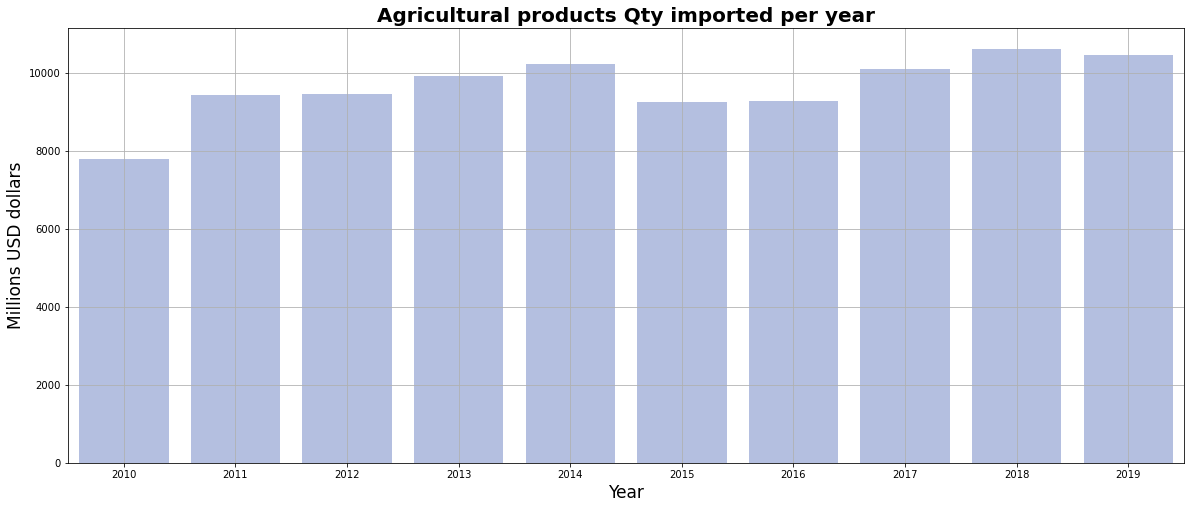

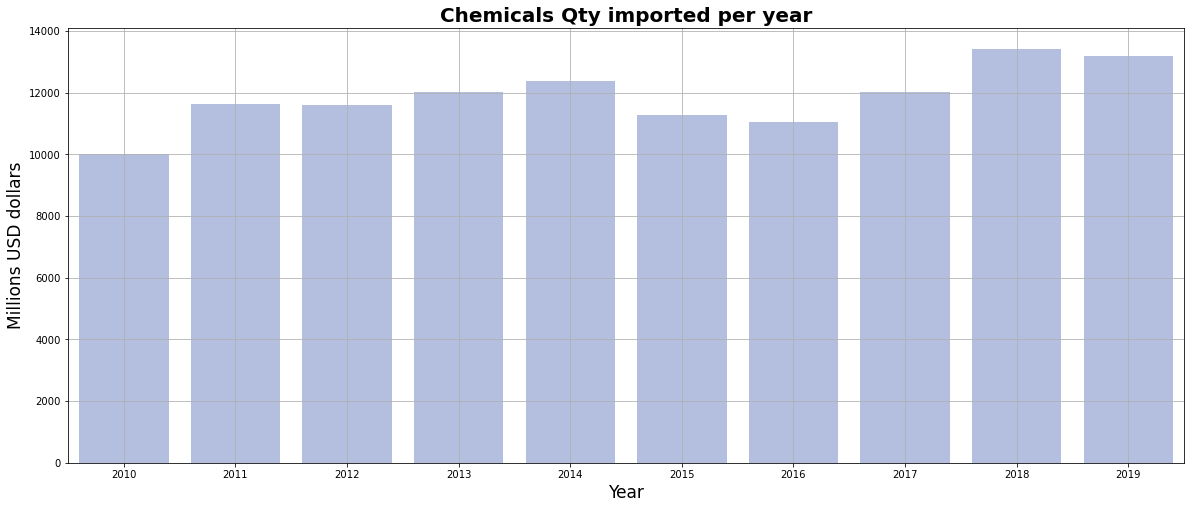

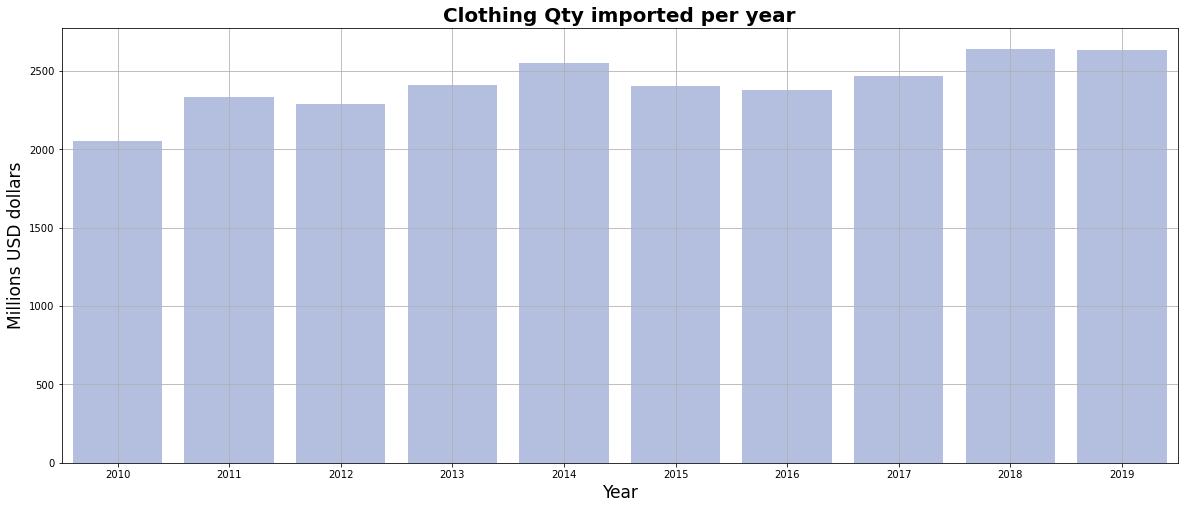

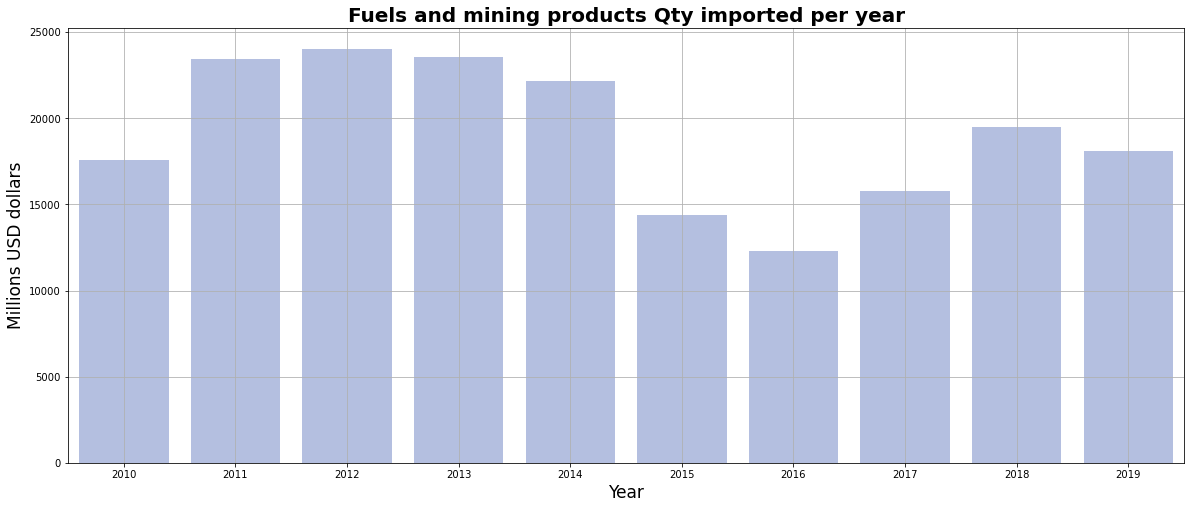

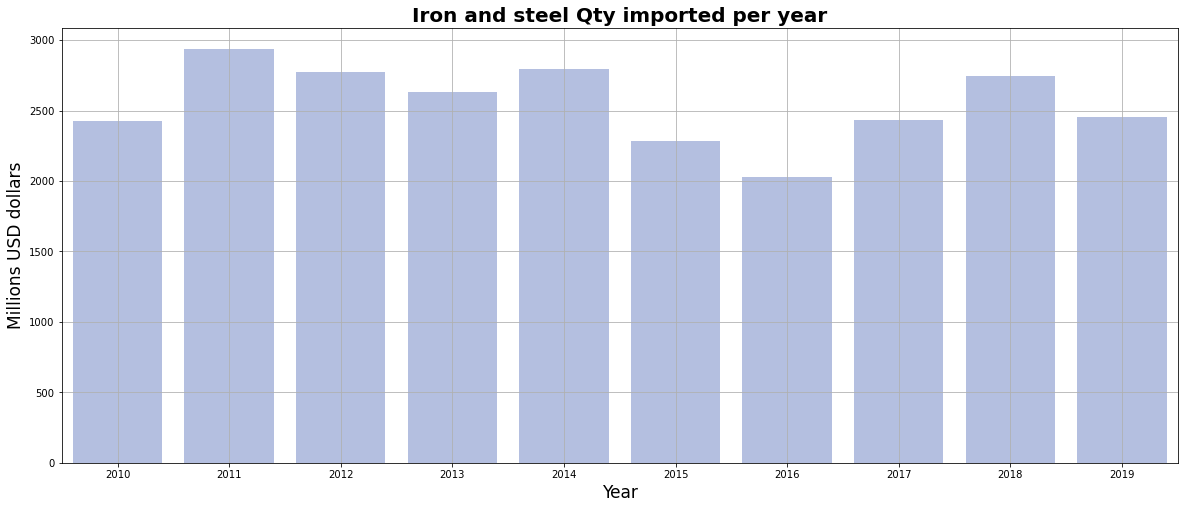

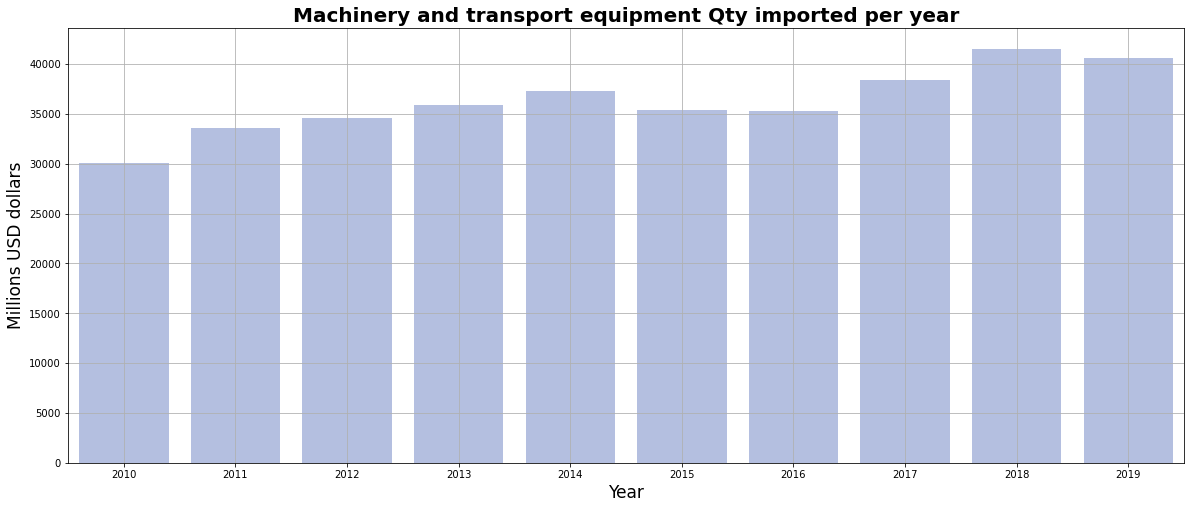

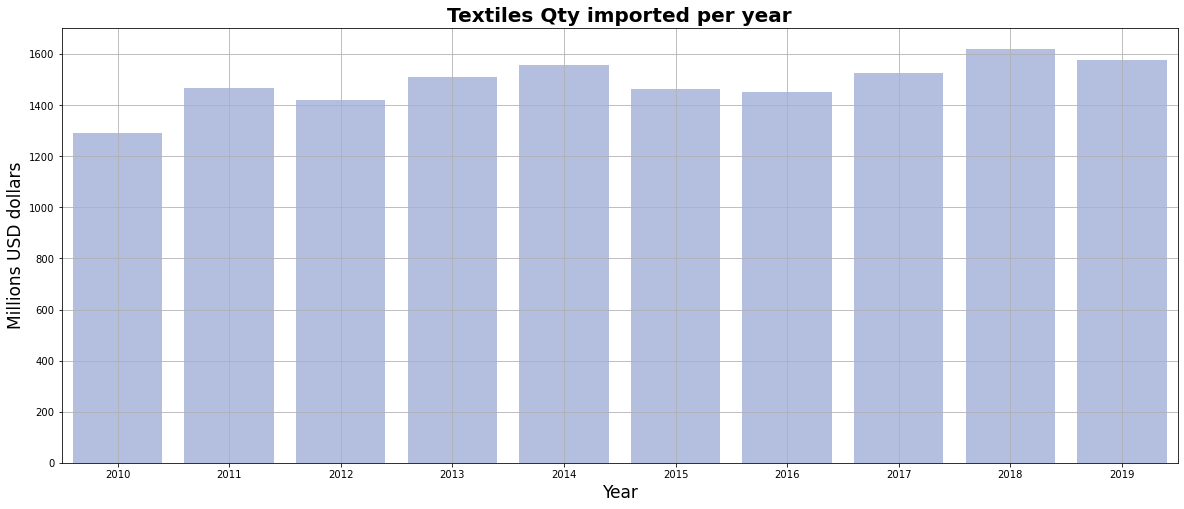

In [29]:
# Barplot
products = df.iloc[:,4:].columns

for product in products:
    plt.figure(figsize=(20,8))

    plt.title("{} Qty imported per year".format(product), fontdict={'fontweight':'bold', 'fontsize':20})

    ax = sns.barplot(df['Year'],df[product], 
                color="#9EB4F6", saturation=.5, capsize=.1, ci=None)

    plt.xlabel('Year', fontdict={'fontweight':'normal', 'fontsize':17})
    plt.ylabel('Millions USD dollars', fontdict={'fontweight':'normal', 'fontsize':17})

    plt.grid(True)

    plt.savefig('output/fig/{}.png'.format(product))
    plt.show()

>##### Plot total imported products per years

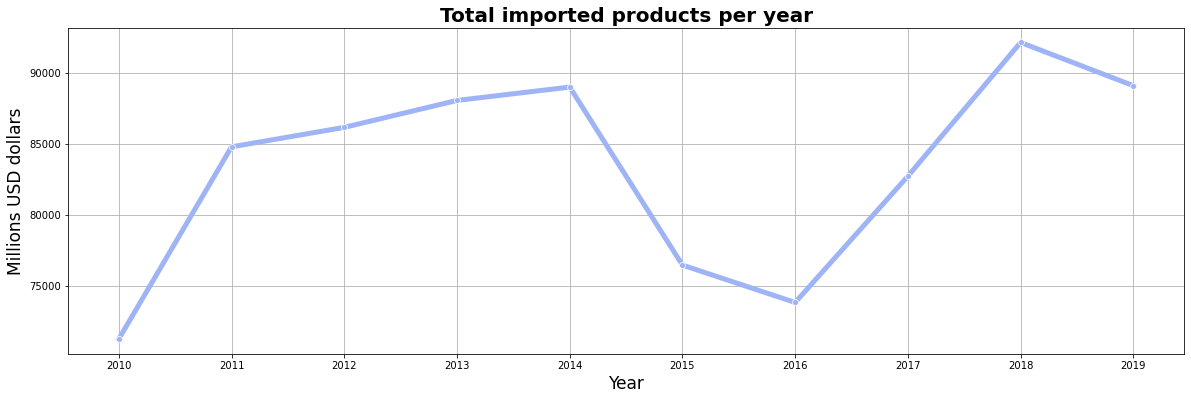

In [30]:
# Lineplot
plt.figure(figsize=(20,6))

plt.title("Total imported products per year", fontdict={'fontweight':'bold', 'fontsize':20})

ax = sns.lineplot(total_df['Year'],total_df['Total'], 
            color="#9EB4F6", marker='o', lw=5, ci=None)

plt.xlabel('Year', fontdict={'fontweight':'normal', 'fontsize':17})
plt.ylabel('Millions USD dollars', fontdict={'fontweight':'normal', 'fontsize':17})

plt.grid(True)

plt.savefig('output/fig/Total_imported_products_per_year.png')
plt.show()

>##### Plot total imported products per country

#### Descriptive Statistical Analysis

In [31]:
# basic statistical measures such as measurements of central tendancy such as mean, median and mode.
print('------ Average ------')
display(X.mean())

print('------ Median ------')
display(X.median())

print('------ Skewness ------')
display(X.skew())

print('------ Max ------')
display(X.max())

print('------ Standard Deviation ------')
display(X.std())

------ Average ------


Agricultural products                 9662.919244
Chemicals                            11857.537228
Clothing                              2415.612257
Fuels and mining products            19103.837342
Iron and steel                        2552.072738
Machinery and transport equipment    36263.190149
Textiles                              1488.734822
dtype: float64

------ Median ------


Agricultural products                1882.5
Chemicals                            1521.5
Clothing                              191.0
Fuels and mining products            1972.5
Iron and steel                        491.0
Machinery and transport equipment    3557.5
Textiles                              276.0
dtype: float64

------ Skewness ------


Agricultural products                4.641722
Chemicals                            4.637335
Clothing                             7.507765
Fuels and mining products            5.773075
Iron and steel                       3.939600
Machinery and transport equipment    6.097013
Textiles                             4.736156
dtype: float64

------ Max ------


Agricultural products                 199397
Chemicals                             271784
Clothing                               96898
Fuels and mining products             579700
Iron and steel                         49373
Machinery and transport equipment    1103063
Textiles                               31883
dtype: int64

------ Standard Deviation ------


Agricultural products                 22715.158337
Chemicals                             29379.819564
Clothing                               8499.946818
Fuels and mining products             57360.861730
Iron and steel                         5299.130806
Machinery and transport equipment    104291.655932
Textiles                               3311.856119
dtype: float64

In [32]:
# Describe the dataset
X.describe()

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
count,1746.000000,1746.000000,1746.000000,1746.000000,1746.000000,1.746000e+03,1746.000000
mean,9662.919244,11857.537228,2415.612257,19103.837342,2552.072738,3.626319e+04,1488.734822
std,22715.158337,29379.819564,8499.946818,57360.861730,5299.130806,1.042917e+05,3311.856119
min,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000e+00,0.000000
25%,549.000000,304.500000,30.000000,495.250000,91.250000,8.017500e+02,46.000000
50%,1882.500000,1521.500000,191.000000,1972.500000,491.000000,3.557500e+03,276.000000
75%,7829.000000,8410.750000,959.000000,10431.000000,2073.250000,2.164975e+04,1278.750000
max,199397.000000,271784.000000,96898.000000,579700.000000,49373.000000,1.103063e+06,31883.000000


#### Pairplot of Variables

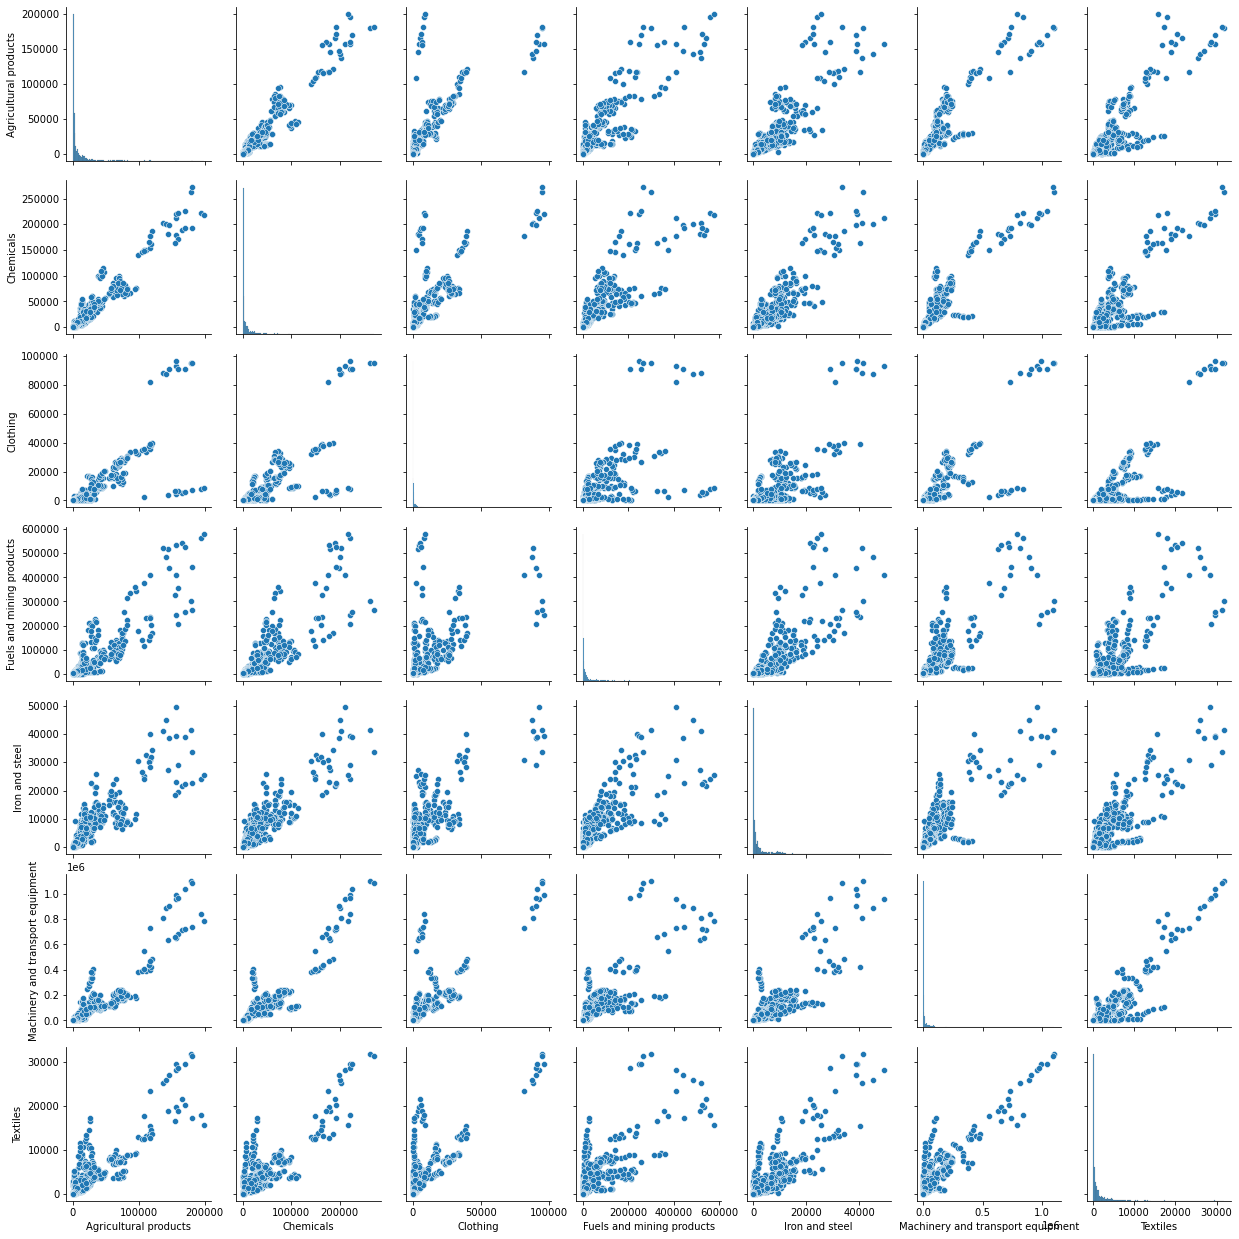

In [33]:
# Pairplot
sns.pairplot(X)
plt.show()

#### Distribution of Variables

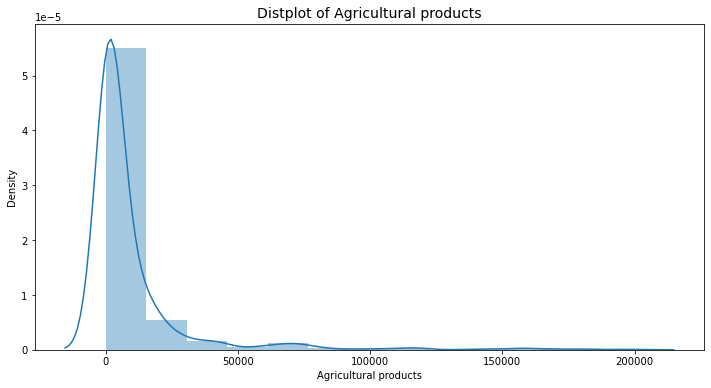

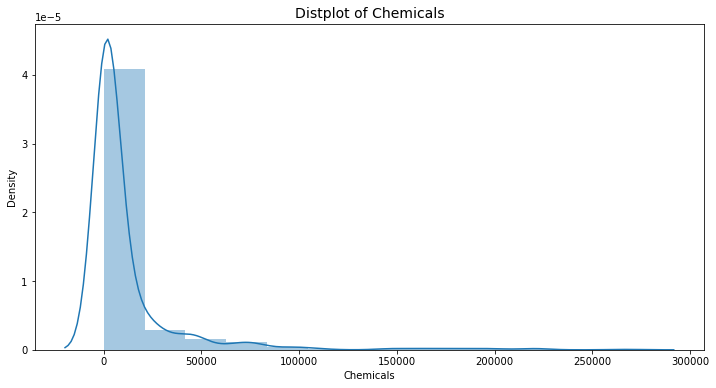

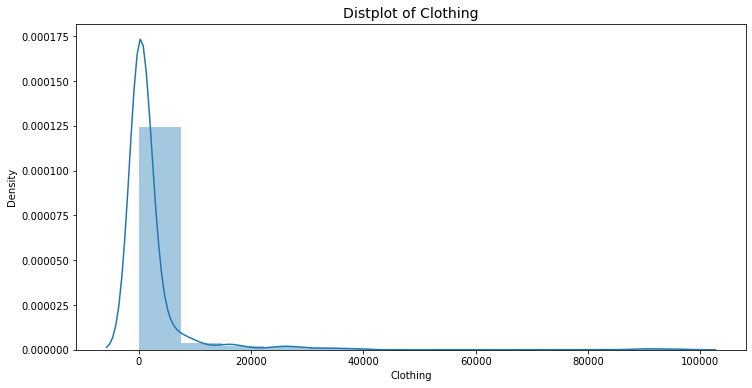

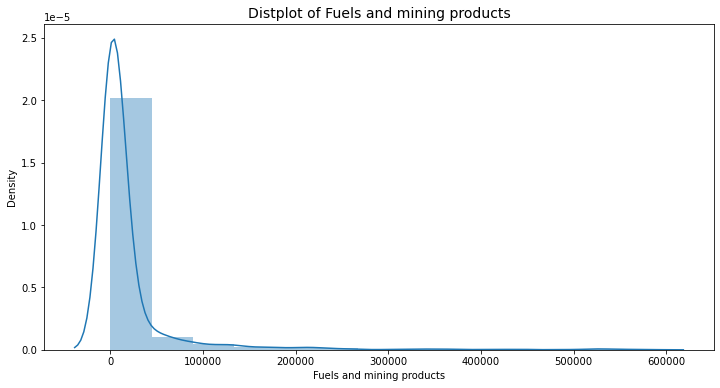

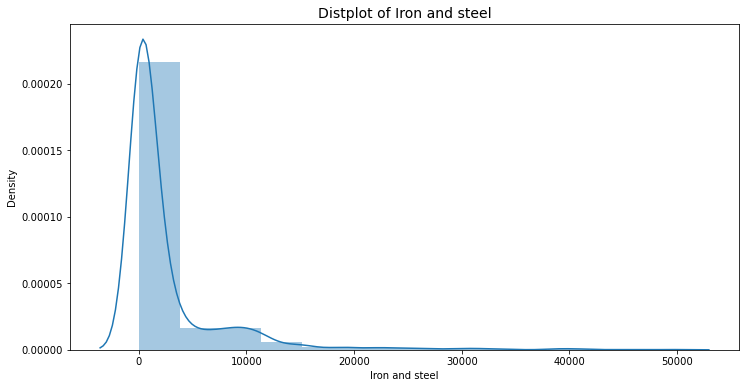

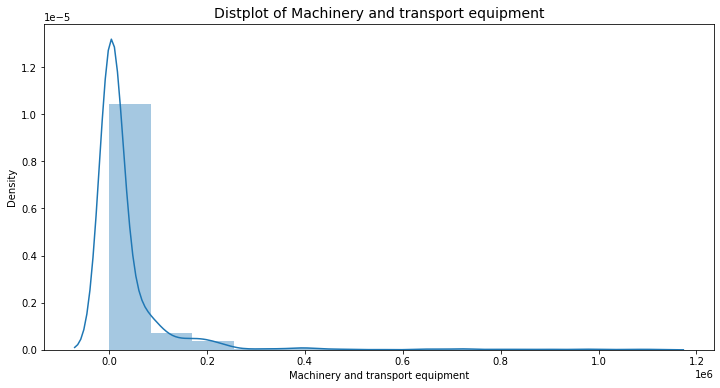

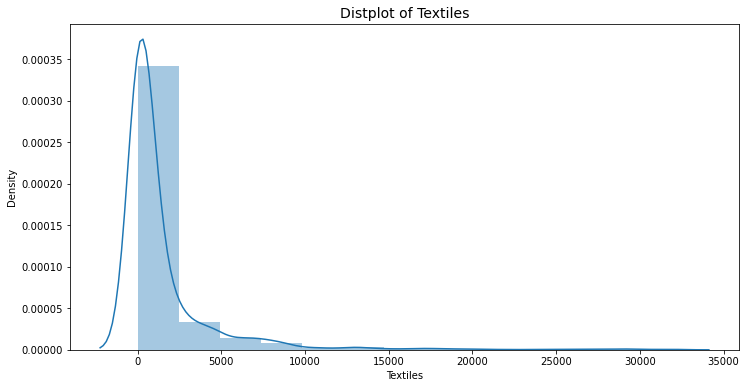

In [34]:
cols_for_dis = X.columns

for x in cols_for_dis:
    plt.figure(1 , figsize = (12, 6))
    sns.distplot(df[x] , bins = 13)
    plt.title('Distplot of {}'.format(x), size=14)
    plt.show()

####  Correlation of all variables

In [35]:
# Correlation of variables
corr = X.corr()
corr

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
Agricultural products,1.000000,0.967023,0.805392,0.896097,0.889094,0.930378,0.890551
Chemicals,0.967023,1.000000,0.821128,0.871131,0.913557,0.928262,0.887127
Clothing,0.805392,0.821128,1.000000,0.661801,0.782651,0.841310,0.811582
Fuels and mining products,0.896097,0.871131,0.661801,1.000000,0.813448,0.845237,0.792676
Iron and steel,0.889094,0.913557,0.782651,0.813448,1.000000,0.854222,0.869912
Machinery and transport equipment,0.930378,0.928262,0.841310,0.845237,0.854222,1.000000,0.908825
Textiles,0.890551,0.887127,0.811582,0.792676,0.869912,0.908825,1.000000


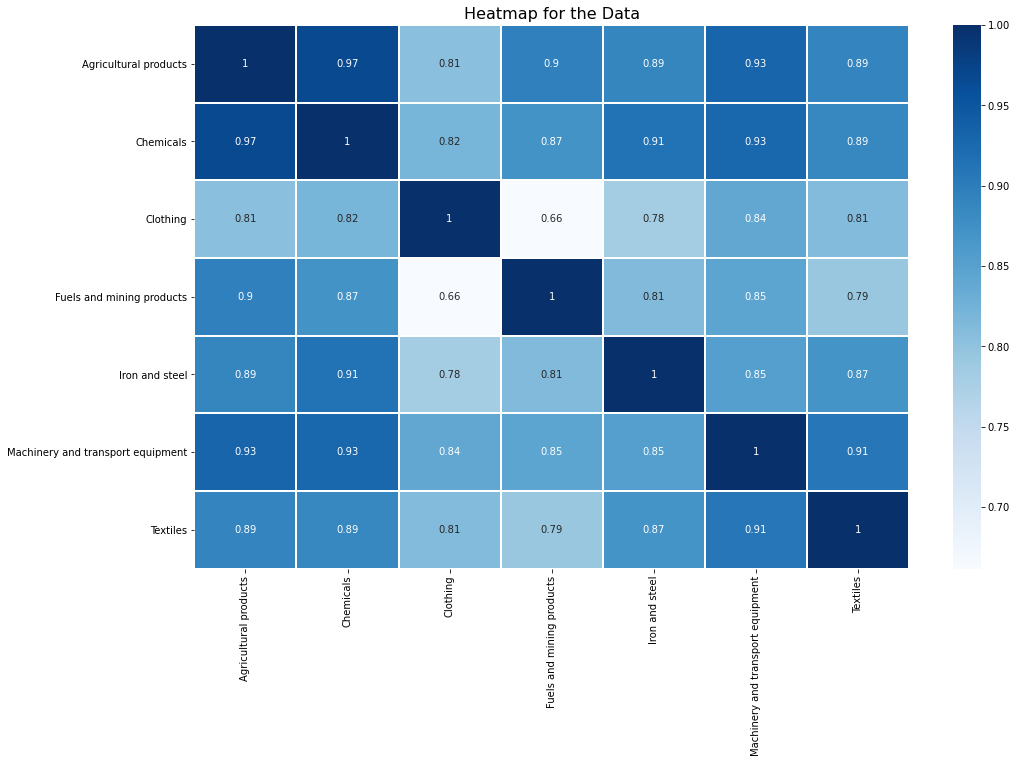

In [36]:
# Heatmap for visualization
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="Blues", cbar=True, 
            annot=True, linecolor='white', 
            linewidths=1) 
plt.title('Heatmap for the Data', fontsize = 16)
plt.show()

#### Outliers in the dataset

>##### 1. Outlier detection using visualization (Boxplot)

In [37]:
# Define a function called "plt_boxplot"
def plt_boxplot(X, col):
    plt.figure(figsize=(20,4))
    bplt = sns.boxplot(X[col])
    bplt.axes.set_title("Box plot to identy outliers in {}'s variable".format(col),fontsize=16)
    bplt.set_xlabel(col,fontsize=14)
    bplt.tick_params(labelsize=9)
    plt.show()

In [38]:
X.columns

Index(['Agricultural products', 'Chemicals', 'Clothing',
       'Fuels and mining products', 'Iron and steel',
       'Machinery and transport equipment', 'Textiles'],
      dtype='object')

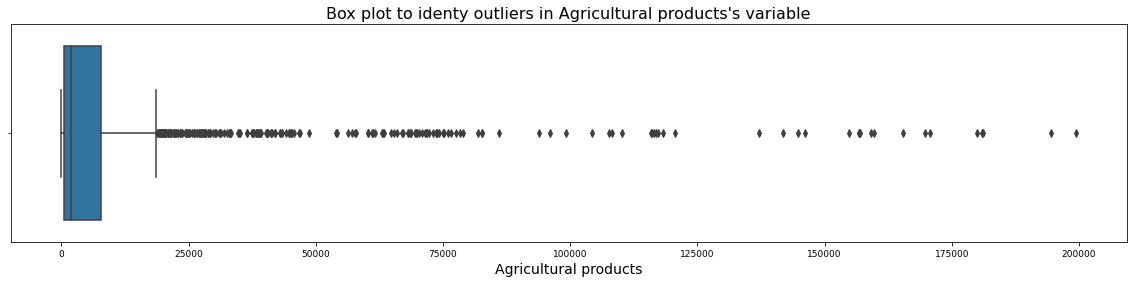

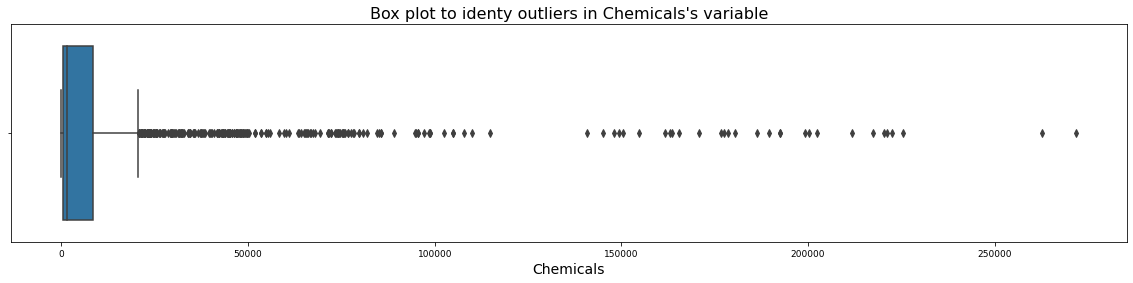

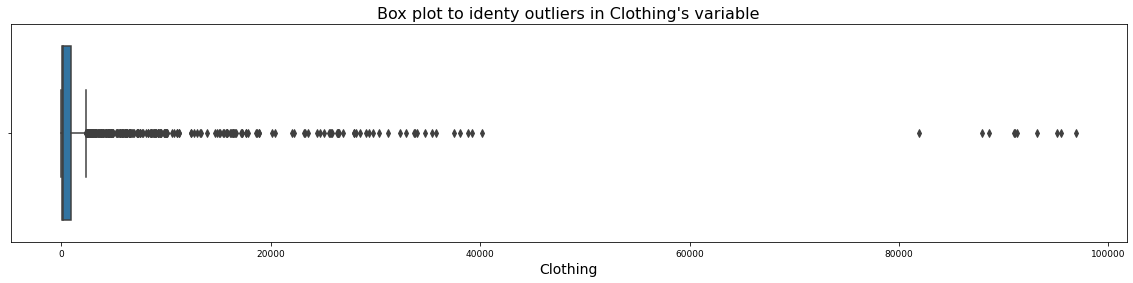

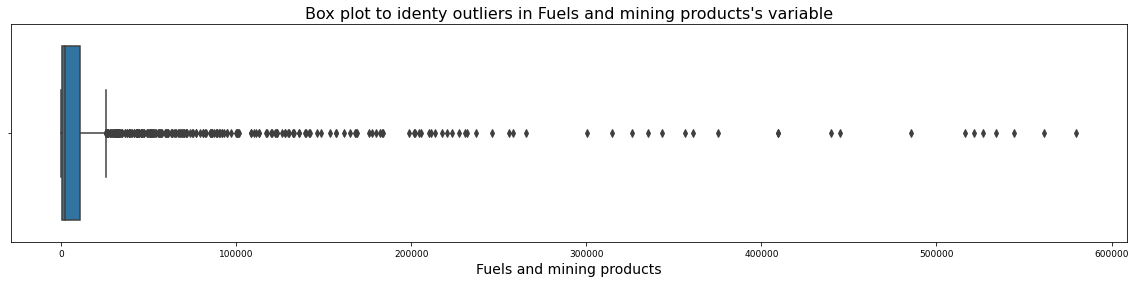

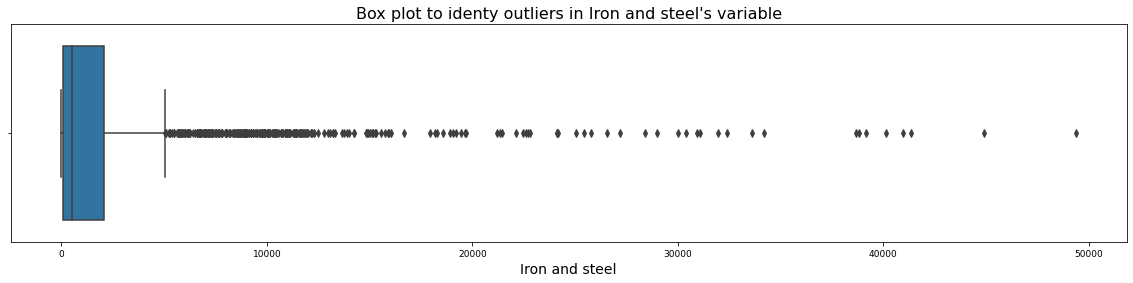

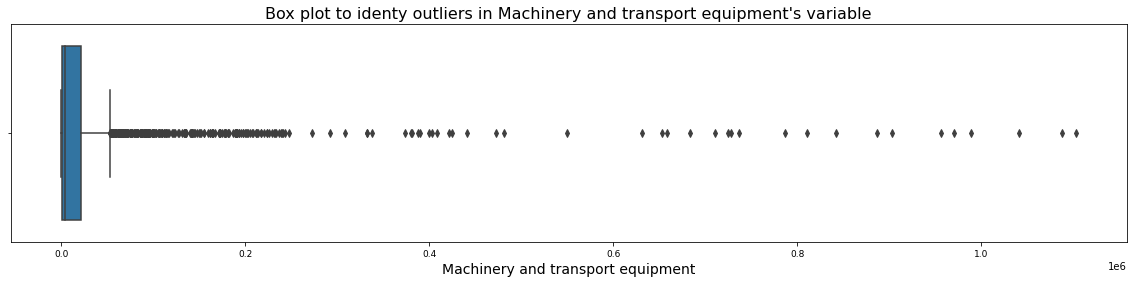

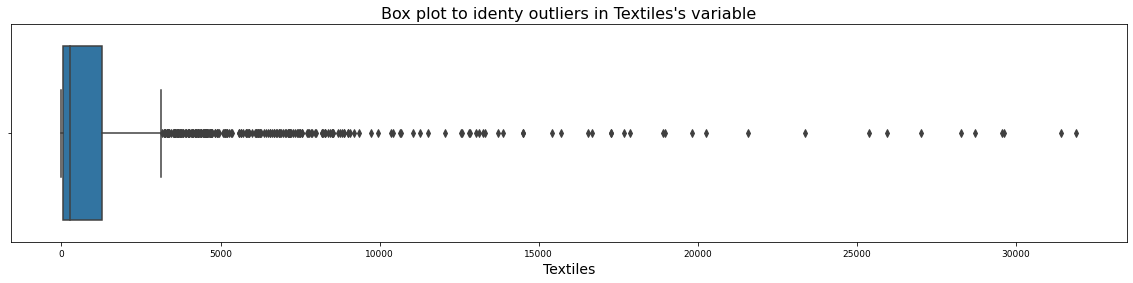

In [39]:
# Identify if there are any outliers in the dataset based on statistical measures.
cols = X.columns

for col in cols:
    plt_boxplot(X, col)

**Conclusion**: as we can see in our boxplots we identified so many outliers in our data...

>##### Scaling the data

In [40]:
# Importing the StandardScaler & MinMaxScaler Module from Sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [41]:
# Creating object for the MinMaxScaler function
scaler = RobustScaler().fit(X)

In [42]:
# Transform the data
scaled_array = scaler.transform(X)
print(scaled_array)

[[-1.61607143e-01 -1.77579029e-01 -1.92680301e-01 ... -2.26538850e-01
  -1.54379317e-01 -1.28168728e-01]
 [-1.38804945e-01 -1.30454896e-01 -1.93756728e-02 ... -1.42280525e-01
  -1.28669417e-01 -8.76090043e-02]
 [ 7.51030220e-01  3.61511180e-01 -8.61141012e-03 ...  2.39354188e+00
   6.31163661e-01  6.08395863e-02]
 ...
 [-1.57967033e-03 -1.46861989e-01 -1.41011841e-01 ... -1.39757820e-01
  -1.48239639e-01 -1.66294869e-01]
 [-1.80288462e-01 -1.05474171e-02 -1.29171152e-01 ... -1.17053481e-01
  -6.58336531e-02 -1.82518759e-01]
 [-2.03090659e-01 -7.72860447e-02 -1.91603875e-01 ... -1.75075681e-01
  -1.14999041e-01 -1.70350842e-01]]


In [43]:
# Convert the scaled array to dataframe
X_scaled = pd.DataFrame(scaled_array, columns=list(X.columns))

In [44]:
# Display the Scale Dataframe
display(X_scaled.head())
display(X_scaled.shape)

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles
0,-0.161607,-0.177579,-0.192680,-0.088821,-0.226539,-0.154379,-0.128169
1,-0.138805,-0.130455,-0.019376,-0.117807,-0.142281,-0.128669,-0.087609
2,0.751030,0.361511,-0.008611,-0.048260,2.393542,0.631164,0.060840
3,0.137294,-0.068897,-0.068891,0.126865,0.280020,0.139941,-0.136281
4,-0.243063,-0.183624,-0.196986,-0.197922,-0.244702,-0.165891,-0.214155


(1746, 7)

####  PCA: Principal Component Analysis

In [45]:
# PCA with data scaled with MinMaxScaler()
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)

In [46]:
pca_array = pca.fit_transform(X)

In [47]:
pca_array

array([[-42909.36971544,    242.75116345],
       [-42441.04194081,    718.0963863 ],
       [-26367.23147237,   6713.85285846],
       ...,
       [-42409.64644821,    -43.42629918],
       [-40810.13702569,    570.70072612],
       [-41897.6528091 ,    240.8217507 ]])

In [48]:
# Convert to dataframe
X_pca = pd.DataFrame(data=pca_array, columns=['PC1','PC2'])

In [49]:
# Overview the PCA dataframe
X_pca

,PC1,PC2
0,-42909.369715,242.751163
1,-42441.041941,718.096386
2,-26367.231472,6713.852858
3,-36125.164139,1006.806875
4,-43699.102248,1129.326195
...,...,...
1741,-42011.099905,588.809733
1742,72102.142269,26039.440760
1743,-42409.646448,-43.426299
1744,-40810.137026,570.700726


#### Building the Model using K-Means algorithms

>##### Find the optimal K for the cluster using KElbowVisualizer

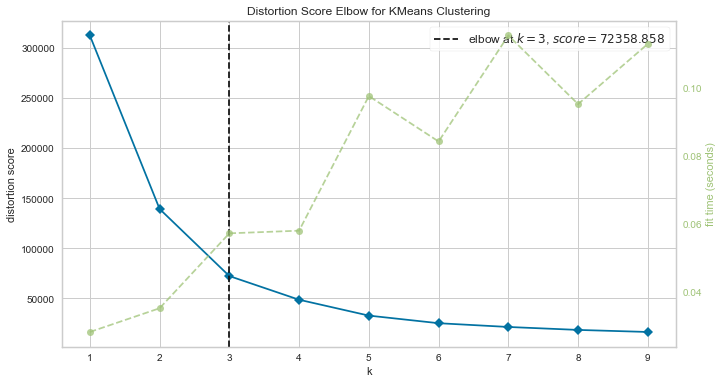

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# Load Yellowbrick module for Kelbow visualizer
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()

plt.figure(figsize=(11,6))
visualizer = KElbowVisualizer(km, k=(1,10))
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Conclusion**: The optimal number of clusters based on the Kelbow visualizer Score is 3. 
But a choice of 2 or 3 clusters seems to be fair. Let's see the silhouette score.

>##### Silhouettes Plot

In [51]:
from yellowbrick.cluster import SilhouetteVisualizer

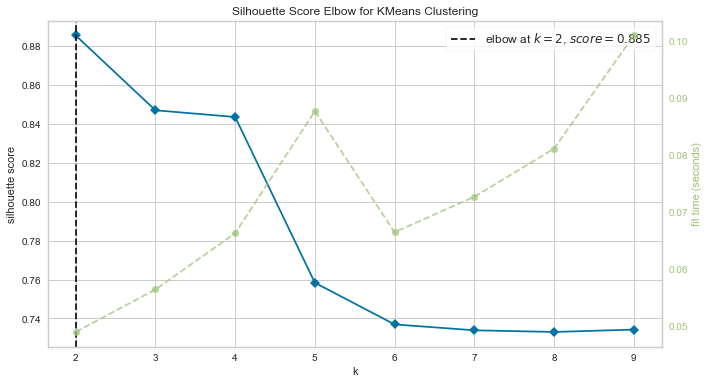

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
# Instantiate the clustering model and visualizer
plt.figure(figsize=(11,6))

visualizer = KElbowVisualizer(km, k=(2,10),metric='silhouette')
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Conclusion**: The optimal number of clusters based on Silhouette Score is 2. We are going to use 2 for ou optimal K number

>##### 1. Creating our K-Means modele

In [53]:
X_model = X_scaled.copy()

# init model
kmean_model = KMeans(n_clusters=2, init="k-means++", random_state=0)
kmean_model.fit_predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [54]:
# Labels and Centroid/Cluster Centers
print('------ Labels Clusters ------')
kmean_clusters = kmean_model.labels_
display(kmean_clusters)

print('------ Centroids ------')
kmean_centroids = kmean_model.cluster_centers_
display(kmean_centroids)

------ Labels Clusters ------


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

------ Centroids ------


array([[143558.66666667, 188076.86666667,  44608.66666667,
        336840.53333333,  30826.        , 688451.56666667,
         20024.36666667],
       [  7322.08449883,   8776.77972028,   1677.97144522,
         13549.        ,   2057.77331002,  24861.29545455,
          1164.68531469]])

In [55]:
# Add more variables to the Dataset before visualization
X_model['countries'] = countries
X_model['latitude'] = latitude
X_model['longitude'] = longitude
X_model['cluster'] = kmean_clusters

In [56]:
# Display the final dataframe
display(X_model.head())
display(X_model.shape)

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles,countries,latitude,longitude,cluster
0,-0.161607,-0.177579,-0.192680,-0.088821,-0.226539,-0.154379,-0.128169,Afghanistan,33.939110,67.709953,1
1,-0.138805,-0.130455,-0.019376,-0.117807,-0.142281,-0.128669,-0.087609,Albania,41.153332,20.168331,1
2,0.751030,0.361511,-0.008611,-0.048260,2.393542,0.631164,0.060840,Algeria,28.033886,1.659626,1
3,0.137294,-0.068897,-0.068891,0.126865,0.280020,0.139941,-0.136281,Angola,-11.202692,17.873887,1
4,-0.243063,-0.183624,-0.196986,-0.197922,-0.244702,-0.165891,-0.214155,Antigua and Barbuda,17.060816,-61.796428,1


(1746, 11)

>##### 2. Clusters profile

In [57]:
# Choose which cluster can be use as our target
cluster_profil = X_model.drop(columns=['latitude','longitude'], axis=1).groupby('cluster').mean()
cluster_profil['Observation']=X_model.cluster.value_counts().sort_index()
cluster_profil

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles,Observation
cluster,,,,,,,,
0,19.461012,23.013769,47.812343,33.703347,15.305247,32.851788,16.019766,30
1,0.747196,0.895023,1.600615,1.165136,0.790501,1.021863,0.720897,1716


**Conclusion**: As we can see in this cluster profil dataframe above,

<ul>
    <li> <strong>Cluster 0:</strong> Country that import more, this is our target cluster </li>
    <li> <strong>Cluster 1:</strong> Country that import Less </li>
</ul>

<br><br>

<h1 align="center"> Reflections </h1>

#### Summary of Data Analysis

In [58]:
#Visualizing all the clusters 
df00 = X_model[X_model['cluster'] == 0]
df01 = X_model[X_model['cluster'] == 1]

>##### Visualizing Clusters

In [81]:
c_map = X_model.copy()

In [82]:
c_map['cluster'].value_counts()

1    1716
0      30
Name: cluster, dtype: int64

In [83]:
# Def Scatter Colors
def clust_color(row):
    if row['cluster'] == 1:
        return 'blue'
    elif row['cluster'] == 0:
        return 'pink'

In [84]:
# Apply function
c_map['color_cluster'] = c_map.apply(clust_color, axis=1)

In [85]:
c_map['color_cluster'].value_counts()

blue    1716
pink      30
Name: color_cluster, dtype: int64

In [64]:
c_map.columns

Index(['Agricultural products', 'Chemicals', 'Clothing',
       'Fuels and mining products', 'Iron and steel',
       'Machinery and transport equipment', 'Textiles', 'countries',
       'latitude', 'longitude', 'cluster', 'color_cluster'],
      dtype='object')

In [86]:
# Select to display only our target cluster
c_map = c_map[c_map['cluster'] == 0]

In [87]:
c_map

,Agricultural products,Chemicals,Clothing,Fuels and mining products,Iron and steel,Machinery and transport equipment,Textiles,countries,latitude,longitude,cluster,color_cluster
35,14.612294,18.244626,2.504844,37.545278,12.393037,26.195726,14.117218,China,35.861660,104.195397,0,pink
60,13.357761,17.187911,34.552207,17.489621,15.077699,18.096628,10.344352,Germany,51.165691,10.451526,0,pink
168,15.741552,21.623870,87.998924,41.014871,15.362765,34.745995,18.741026,United States,37.090240,-95.712891,0,pink
211,19.621085,22.084256,4.113025,51.756989,13.458123,30.092071,15.108497,China,35.861660,104.195397,0,pink
236,15.856937,19.928882,41.572659,23.631684,19.993946,20.218846,12.280673,Germany,51.165691,10.451526,0,pink
346,18.582212,24.772182,95.171152,52.299072,20.424319,38.730214,20.350436,United States,37.090240,-95.712891,0,pink
389,21.284684,21.841110,4.665231,53.525652,11.268920,31.173230,15.845873,China,35.861660,104.195397,0,pink
414,14.880288,18.368975,36.190527,22.988652,16.101413,18.539308,10.517948,Germany,51.165691,10.451526,0,pink
522,19.230838,24.514726,94.473628,48.632111,22.414228,42.354351,20.824985,United States,37.090240,-95.712891,0,pink
564,22.471635,23.206847,5.541442,54.584858,10.571140,33.921455,17.267897,China,35.861660,104.195397,0,pink


In [88]:
from branca.element import Figure

fig = Figure(width=1400, height=450)

clus_map = folium.Map(
    zoom_start=5,
    tiles="cartodbpositron"
)

for _, c in c_map.iterrows():
    folium.Marker(
        location=[c['latitude'], c['longitude']],
        popup=c['countries'],
        tooltip=c['countries'],
        icon=folium.Icon(color=c['color_cluster'])
    ).add_to(clus_map)

clus_map
fig.add_child(clus_map)

>##### Total Products imported by countries from 2010 to 2019

In [67]:
# Calculate the total imported per countries & Per Year products

#### Questions unanswered

In [68]:
# What aspects of the research question were we unable to answer and why?

#### Recommendations

In [69]:
# What should the reader do next with this information?

#### Next Steps

In [70]:
# What will the analyst do next based on the analysis?